# IMPORT

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display, clear_output
from ipywidgets import interactive
from wordcloud import WordCloud, STOPWORDS
from ipywidgets import interact



### Reading CSV & Data exploration

In [7]:
df = pd.read_csv("csv_files\\regularite-mensuelle-tgv-aqst.csv",sep=";")

In [11]:
df['date'] = pd.to_datetime(df['date'])

In [74]:

def plot_trains_retard(gare_type):
    if gare_type == 'Départ':
        xpoints = df['gare_depart']
        ypoints = df['nb_train_depart_retard']
        title = 'Nombre de Trains en Retard par Gare de Départ'
    elif gare_type == 'Arrivée':
        xpoints = df['gare_arrivee']
        ypoints = df['nb_train_retard_arrivee']
        title = 'Nombre de Trains en Retard par Gare d\'Arrivée'
    else:
        return  # Ne rien afficher si le type de gare n'est pas valide

    plt.figure(figsize=(12, 6))
    plt.bar(xpoints, ypoints, color='orange')
    plt.xlabel('Gare')
    plt.ylabel('Nombre de Trains en Retard')
    plt.title(title)
    plt.xticks(rotation=90)
    plt.show()

# Utiliser interact pour créer la liste défilante
interact(plot_trains_retard, gare_type=['Arrivée', 'Départ'])

interactive(children=(Dropdown(description='gare_type', options=('Arrivée', 'Départ'), value='Arrivée'), Outpu…

<function __main__.plot_trains_retard(gare_type)>

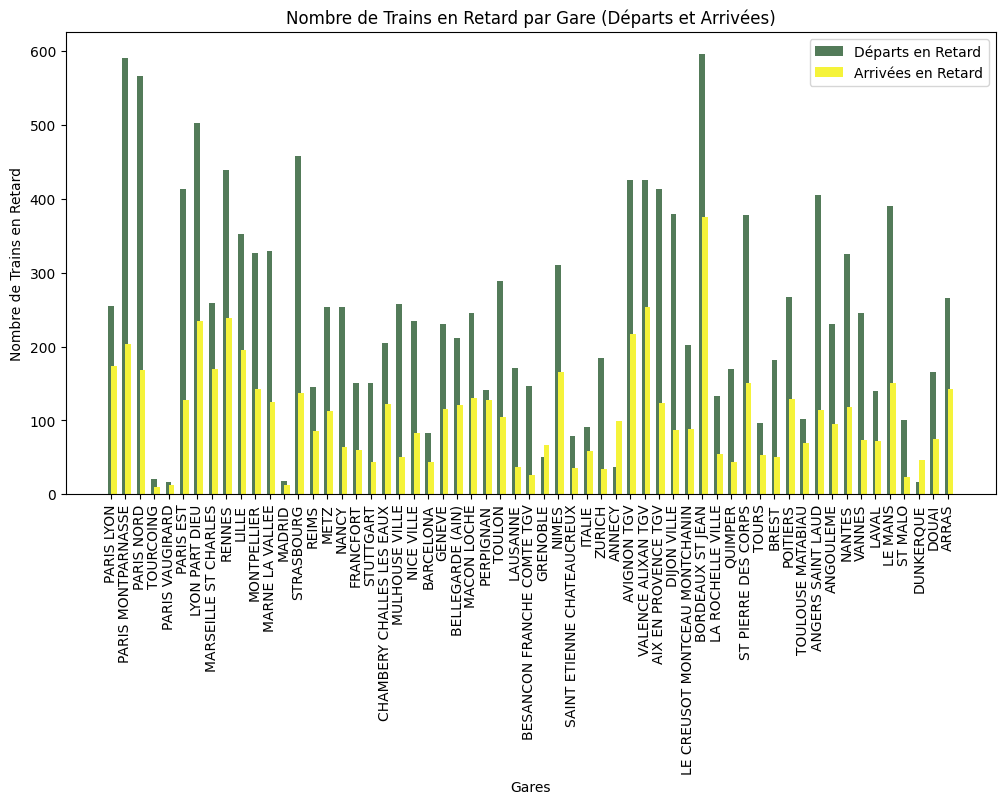

In [14]:
gares = df['gare_depart'] 

x = gares
width = 0.4  # Largeur des barres

plt.figure(figsize=(12, 6))
bars1 = plt.bar(x, df['nb_train_depart_retard'], width=width, label='Départs en Retard',color='#537B59')
bars2 = plt.bar(x, df['nb_train_retard_arrivee'], width=width, label='Arrivées en Retard', align='edge',color='#F5F33A')

plt.xlabel('Gares')
plt.xticks(rotation=90)
plt.ylabel('Nombre de Trains en Retard')
plt.title('Nombre de Trains en Retard par Gare (Départs et Arrivées)')

plt.legend()

plt.show()

Nous remarquons que pour nos trajets, nous avons une majorité de retards au départ et moins pour retard à l'arrivé. 
Nous pouvons alors supposer que les trains dans la majorité réussissent à rattraper leur retard durant leur trajet. 

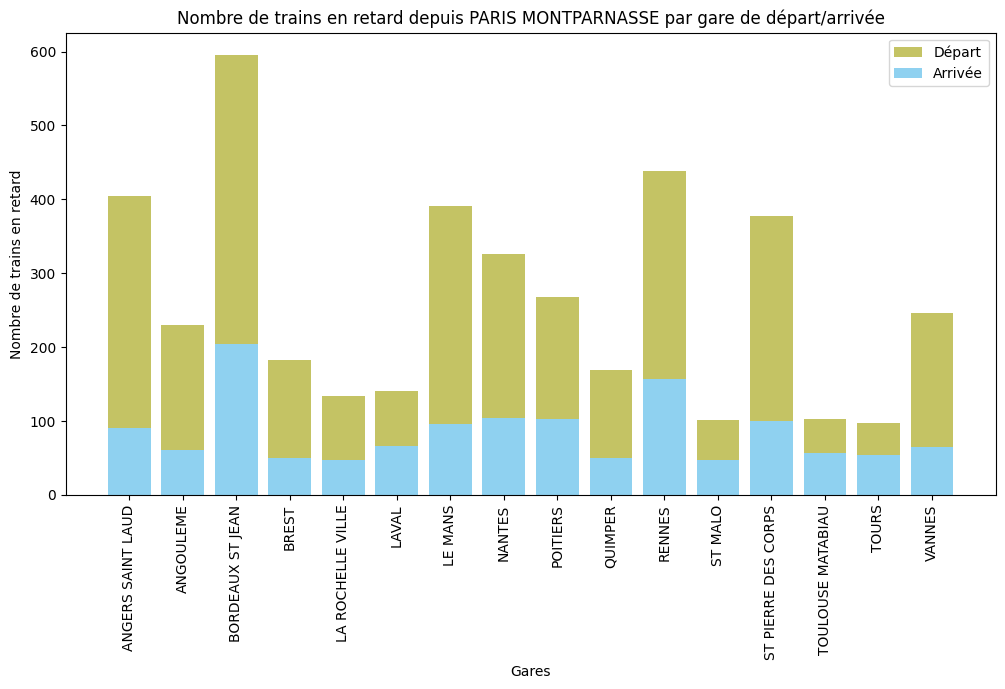

In [79]:

# Filtrez les données pour Paris Montparnasse (départ et arrivée)
paris_montparnasse_data_depart = df[df['gare_arrivee'] == 'PARIS MONTPARNASSE']
paris_montparnasse_data_arrivee = df[df['gare_depart'] == 'PARIS MONTPARNASSE']

# Triez les données pour les deux cas
paris_montparnasse_data_depart = paris_montparnasse_data_depart.sort_values(by='gare_depart')
paris_montparnasse_data_arrivee = paris_montparnasse_data_arrivee.sort_values(by='gare_arrivee')

# Créez un graphique
plt.figure(figsize=(12, 6))

# Affichez les données de départ en bleu
plt.bar(paris_montparnasse_data_depart['gare_depart'], paris_montparnasse_data_depart['nb_train_depart_retard'], color='#C4C364', label='Départ')

# Affichez les données d'arrivée en vert
plt.bar(paris_montparnasse_data_arrivee['gare_arrivee'], paris_montparnasse_data_arrivee['nb_train_retard_arrivee'], color='#8FD1F0', label='Arrivée')

plt.xlabel('Gares')
plt.ylabel('Nombre de trains en retard')
plt.xticks(rotation=90)  # Rotation des étiquettes pour une meilleure lisibilité
plt.title('Nombre de trains en retard depuis PARIS MONTPARNASSE par gare de départ/arrivée')
plt.legend()  # Ajoutez une légende pour différencier les données de départ et d'arrivée

plt.show()






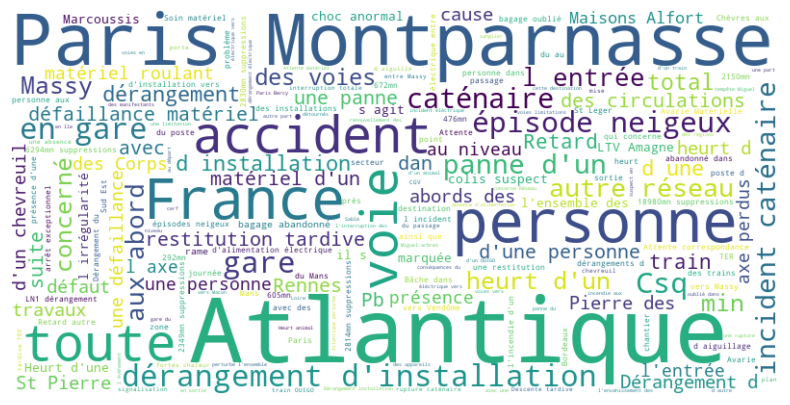

In [81]:
commentaires_retard_arrivee = df['commentaires_retard_arrivee']
commentaires_retard_arrivee = commentaires_retard_arrivee.dropna()  
# Concaténez tous les commentaires en une seule chaîne de texte
texte = " ".join(commentaires_retard_arrivee)
stop_words = ["pour", "la", "sur", "le","un","à","les","de","grande vitesse","minutes perdues","TGV retardé"
              ,"Ce","mois","-","ci","l'OD", "a", "été","touchée","par","minutes","vitesse","TGV","impacté","impactés","perdues",
              "grande","ligne","perdues","et","retardés","incidents","suivants"] + list(STOPWORDS)
# Créez un objet WordCloud
wordcloud = WordCloud(stopwords = stop_words,width=800, height=400, background_color='white').generate(texte)

# Affichez le nuage de mots
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [82]:
noms_gares_arrivee = df['gare_arrivee'].unique()
noms_gares_départ =  df['gare_depart'].unique()


print("                 |=== LISTE DES ",len(noms_gares_départ)," GARES ===|")
print(noms_gares_départ)
print(len(noms_gares_départ))

                 |=== LISTE DES  59  GARES ===|
['PARIS LYON' 'PARIS MONTPARNASSE' 'PARIS NORD' 'TOURCOING'
 'PARIS VAUGIRARD' 'PARIS EST' 'LYON PART DIEU' 'MARSEILLE ST CHARLES'
 'RENNES' 'LILLE' 'MONTPELLIER' 'MARNE LA VALLEE' 'MADRID' 'STRASBOURG'
 'REIMS' 'METZ' 'NANCY' 'FRANCFORT' 'STUTTGART'
 'CHAMBERY CHALLES LES EAUX' 'MULHOUSE VILLE' 'NICE VILLE' 'BARCELONA'
 'GENEVE' 'BELLEGARDE (AIN)' 'MACON LOCHE' 'PERPIGNAN' 'TOULON' 'LAUSANNE'
 'BESANCON FRANCHE COMTE TGV' 'GRENOBLE' 'NIMES'
 'SAINT ETIENNE CHATEAUCREUX' 'ITALIE' 'ZURICH' 'ANNECY' 'AVIGNON TGV'
 'VALENCE ALIXAN TGV' 'AIX EN PROVENCE TGV' 'DIJON VILLE'
 'LE CREUSOT MONTCEAU MONTCHANIN' 'BORDEAUX ST JEAN' 'LA ROCHELLE VILLE'
 'QUIMPER' 'ST PIERRE DES CORPS' 'TOURS' 'BREST' 'POITIERS'
 'TOULOUSE MATABIAU' 'ANGERS SAINT LAUD' 'ANGOULEME' 'NANTES' 'VANNES'
 'LAVAL' 'LE MANS' 'ST MALO' 'DUNKERQUE' 'DOUAI' 'ARRAS']
59


In [35]:
# Create a dropdown widget for selecting the destination
destination_dropdown = widgets.Dropdown(
    options=df['gare_arrivee'].unique(),
    description='Select Destination:',
    disabled=False,
)

# Function to plot the selected destination
def plot_destination_annulations(destination):
    data_destination = df[df['gare_arrivee'] == destination]

    fig, ax = plt.subplots(figsize=(8, 4))
    
    # Groupez les données par année et calculez le nombre total d'annulations par année
    annulations_par_an = data_destination.groupby('date')['nb_annulation'].sum()
    ax.plot(annulations_par_an.index, annulations_par_an.values, marker='o')
    ax.set_title("Nombre d'annulations pour la gare : "+destination, fontsize=10)  
    ax.set_xlabel('Année', fontsize=8)  
    ax.set_ylabel('Nombre d\'annulations', fontsize=8) 
    ax.tick_params(axis='x', labelsize=8)  
    ax.tick_params(axis='y', labelsize=8) 
    ax.tick_params(axis='x', rotation=45)
    ax.grid(True)
    
    # Clear the previous output before displaying a new plot
    clear_output(wait=True)
    plt.show()

# Interactive widget to choose a destination and see the corresponding plot
interactive_plot = interactive(plot_destination_annulations, destination=destination_dropdown)
output = interactive_plot.children[-1]
output.layout.height = '400px'

# Display the widget
display(interactive_plot)


interactive(children=(Dropdown(description='Select Destination:', options=('AIX EN PROVENCE TGV', 'ANGERS SAIN…

On remarque lors de l'analyse que la plupart des graphiques montrent des augmentations d'annulation de trains se situent au même date
 

In [31]:
# Create a dropdown widget for selecting the destination
destination_dropdown = widgets.Dropdown(
    options=df['gare_arrivee'].unique(),
    description='Select Destination:',
    disabled=False,
)

# Function to plot the selected destination
def plot_destination(destination):
    data_destination_arrivee = df[df['gare_arrivee'] == destination]

    fig, ax = plt.subplots(figsize=(8, 4))
    
    # Plot the data with labels
    ax.plot(data_destination_arrivee['date'], data_destination_arrivee['prct_cause_externe'], marker='+', label='prct_cause_externe', color='#DE9489')
    ax.plot(data_destination_arrivee['date'], data_destination_arrivee['prct_cause_infra'], marker='+', label='prct_cause_infra', color='#DEDD89')
    ax.plot(data_destination_arrivee['date'], data_destination_arrivee['prct_cause_gestion_trafic'], marker='+', label='prct_cause_gestion_trafic', color='#97DE89')
    ax.plot(data_destination_arrivee['date'], data_destination_arrivee['prct_cause_materiel_roulant'], marker='+', label='prct_cause_materiel_roulant', color='#89DECB')
    ax.plot(data_destination_arrivee['date'], data_destination_arrivee['prct_cause_gestion_gare'], marker='+', label='prct_cause_gestion_gare', color='#899FDE')
    ax.plot(data_destination_arrivee['date'], data_destination_arrivee['prct_cause_prise_en_charge_voyageurs'], marker='+', label='prct_cause_prise_en_charge_voyageurs', color='#DD89DE')

    ax.set_title("Pourcentage des différentes causes qui ont entrainé des problèmes pour la gare : "+destination, fontsize=10)  
    ax.set_xlabel('Date', fontsize=8) 
    ax.set_ylabel('Pourcentage (%)', fontsize=8)
    ax.tick_params(axis='x', labelsize=8) 
    ax.tick_params(axis='y', labelsize=8) 
    ax.grid(True)

    # Add a legend
    ax.legend(fontsize="xx-small",loc="upper right")
    plt.tight_layout()
    plt.show()

# Interactive widget to choose a destination and see the corresponding plot
interactive_plot = interactive(plot_destination, destination=destination_dropdown)
output = interactive_plot.children[-1]
output.layout.height = '400px'

# Display the widget
display(interactive_plot)


interactive(children=(Dropdown(description='Select Destination:', options=('AIX EN PROVENCE TGV', 'ANGERS SAIN…

Il nous est difficile de pouvoir commmenter ce graphique répertoriant trop de données et très disparates....

In [34]:
# Create a dropdown widget for selecting the destination
destination_dropdown = widgets.Dropdown(
    options=df['gare_arrivee'].unique(),
    description='Select Destination:',
    disabled=False,
)

# Function to plot the selected destination
def plot_destination(destination):
    data_destination_arrivee = df[df['gare_arrivee'] == destination]

    fig, ax = plt.subplots(figsize=(8, 4))
    
    # Plot the data with labels
    ax.plot(data_destination_arrivee['date'], data_destination_arrivee['nb_train_prevu'], marker='o', label='Trains Prévus', color='#A0EC85')
    ax.plot(data_destination_arrivee['date'], data_destination_arrivee['nb_annulation'], marker='o', label='Annulations', color='#F16C59')

    ax.set_title("Trains prévus et annulations pour : "+destination, fontsize=10)  
    ax.set_xlabel('Date', fontsize=8) 
    ax.set_ylabel('Pourcentage (%)', fontsize=8)
    ax.tick_params(axis='x', labelsize=8) 
    ax.tick_params(axis='y', labelsize=8) 
    ax.grid(True)

    # Add a legend
    ax.legend(fontsize="xx-small",loc="upper right")
    plt.tight_layout()
    plt.show()

# Interactive widget to choose a destination and see the corresponding plot
interactive_plot = interactive(plot_destination, destination=destination_dropdown)
output = interactive_plot.children[-1]
output.layout.height = '400px'

# Display the widget
display(interactive_plot)



interactive(children=(Dropdown(description='Select Destination:', options=('AIX EN PROVENCE TGV', 'ANGERS SAIN…

Commen nous pouvons remarquer que de 2020 à 2021 nous avons eu une baisse considérable sur le nombre de trains prévu (cela est du à la crise du COVID).